<a href="https://colab.research.google.com/github/Novita20/Kuis2_Machine-Learning/blob/main/TI-3F_23_Novita%20Dwi%20Rahmadani_Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KUIS 2 MECHINE LEARNING**


**Nama        : Novita Dwi Rahmadani**

**Kelas       : TI-3F**

**NIM         : 2141720050**


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Library

In [2]:
# Import library TensorFlow untuk machine learning
import tensorflow as tf
# Import library NumPy untuk manipulasi data numerik
import numpy as np
# Import library Pandas untuk manipulasi data tabular
import pandas as pd
# Import library Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# Import library Seaborn untuk visualisasi data statistik
import seaborn as sns
# Import class LabelBinarizer dari library scikit-learn untuk konversi label kategori ke one-hot encoding
from sklearn.preprocessing import LabelBinarizer
# Import fungsi train_test_split dari library scikit-learn untuk pembagian data menjadi data latih dan uji
from sklearn.model_selection import train_test_split
# Import fungsi classification_report dari library scikit-learn untuk evaluasi performa model
from sklearn.metrics import classification_report
# Import modul zipfile untuk menangani file arsip zip
import zipfile

# Load Dataset

## Load MNIST

In [3]:
from tensorflow.keras.datasets import mnist #mengimpor dataset MNIST dari submodul datasets yang terdapat di dalam pustaka TensorFlow

In [4]:
# Memuat data latih dan uji dari dataset MNIST menggunakan fungsi load_data()
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# Variabel train_data berisi gambar-gambar digit untuk pelatihan model
# Variabel train_labels berisi label-label yang sesuai dengan gambar-gambar digit pada data latih
# Variabel test_data berisi gambar-gambar digit untuk pengujian model
# Variabel test_labels berisi label-label yang sesuai dengan gambar-gambar digit pada data uji


11490434/11490434 [==============================] - 1s 0us/step


In [5]:
# Check shape data
(train_data.shape, test_data.shape) ## Memeriksa dimensi (shape) data latih dan data uji

((60000, 28, 28), (10000, 28, 28))

In [6]:
# cek label
# Memeriksa dan menampilkan bentuk (shape) dari data label latih dan uji
# `train_labels.shape` mengembalikan bentuk data label latih
# `test_labels.shape` mengembalikan bentuk data label uji
(train_labels.shape, test_labels.shape)


((60000,), (10000,))

In [7]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [8]:
# Check the label
train_labels.shape # Memeriksa dimensi atau bentuk array train_labels

(60000,)

### Combine Train and Test Data

In [9]:
# Menggabungkan data latih dan uji secara vertikal menggunakan np.vstack
digits_data = np.vstack([train_data, test_data])
# Menggabungkan label latih dan uji secara horizontal menggunakan np.hstack
digits_labels = np.hstack([train_labels, test_labels])


In [10]:
# Check data shape
digits_data.shape ## Memeriksa bentuk (shape) dari data "digits_data"

(70000, 28, 28)

In [11]:
# Check label shape
digits_labels.shape ## Memeriksa bentuk (shape) dari variabel 'digits_labels'

(70000,)

Text(0.5, 1.0, 'Class: 8')

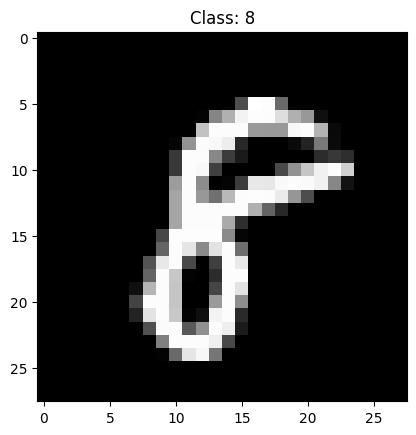

In [12]:
# Memilih indeks acak dari data digits
idx = np.random.randint(0, digits_data.shape[0])
# Menampilkan gambar dengan skala warna abu-abu
plt.imshow(digits_data[idx], cmap='gray')
# Menambahkan judul berisi kelas dari gambar yang dipilih
plt.title('Class: ' + str(digits_labels[idx]))


<Axes: xlabel='Labels', ylabel='count'>

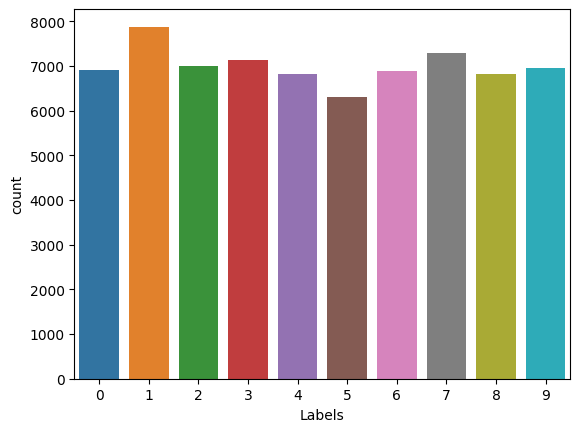

In [13]:
# Buat DataFrame baru untuk label dari data
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
# Visualisasikan distribusi data menggunakan countplot dari Seaborn
sns.countplot(df_labels, x='Labels')


Pada pernyataan pertama, `df_labels = pd.DataFrame(digits_labels, columns=['Labels'])`, sebuah DataFrame baru (`df_labels`) dibuat menggunakan library pandas (dilabeli sebagai `pd`). DataFrame ini dibentuk dari array `digits_labels` dengan satu kolom bernama 'Labels'. DataFrame berguna untuk mempermudah manipulasi dan analisis data.

Selanjutnya, pada pernyataan kedua, `sns.countplot(df_labels, x='Labels')`, menggunakan library seaborn (`sns`), kita membuat visualisasi distribusi data menggunakan countplot. Countplot digunakan untuk menghitung dan memvisualisasikan jumlah kemunculan setiap nilai dalam kolom 'Labels' dari DataFrame. Grafik ini memberikan gambaran tentang sebaran frekuensi setiap label dalam dataset, membantu pemahaman terhadap distribusi kelas dan seimbang atau ketidakseimbangannya.

## Load Kaggle A-Z

In [14]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-09 16:33:51--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   182MB/s    in 1.0s    

2023-12-09 16:33:53 (182 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [15]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

Pernyataan ini digunakan untuk mengekstrak isi dari suatu file zip dengan nama "alfabeto_A-Z.zip". Objek `zipfile.ZipFile` digunakan untuk membuka file zip dalam mode membaca ('r'). Setelah itu, metode `extractall('./')` digunakan untuk mengekstrak semua file dan folder dari zip ke direktori saat ini ('./'). Terakhir, `zip_object.close()` digunakan untuk menutup objek file zip setelah operasi ekstraksi selesai. Dengan demikian, kode ini secara efektif mengekstrak semua konten dari file zip ke dalam direktori saat ini.

In [16]:
# Membaca dataset dari file CSV 'A_Z Handwritten Data.csv' dan mengonversi tipe data menjadi float32
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
# Menampilkan dataset
dataset_az


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pernyataan pertama, `dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')`, membaca dataset dari file CSV bernama 'A_Z Handwritten Data.csv' menggunakan library pandas (`pd`). Kemudian, seluruh tipe data dalam dataset diubah menjadi float32 menggunakan metode `astype('float32')`.

Pernyataan kedua, `dataset_az`, digunakan untuk menampilkan isi dari dataset yang telah dibaca dan diubah tipe datanya. Dengan ini, kita dapat melihat struktur dan nilai-nilai dalam dataset 'A_Z Handwritten Data.csv'.

In [17]:
# Mendapatkan data piksel dari dataset tanpa kolom '0'
alphabet_data = dataset_az.drop('0', axis=1)
# Mendapatkan label dari dataset hanya pada kolom '0'
alphabet_labels = dataset_az['0']


Pernyataan pertama, `alphabet_data = dataset_az.drop('0', axis=1)`, bertujuan untuk mendapatkan data piksel dari dataset `dataset_az` tanpa menyertakan kolom dengan nama '0'. Fungsi `drop` digunakan untuk menghapus kolom dengan nama yang diberikan, dan `axis=1` menunjukkan bahwa yang dihapus adalah kolom, bukan baris.

Pernyataan kedua, `alphabet_labels = dataset_az['0']`, bertujuan untuk mendapatkan label dari dataset `dataset_az` hanya pada kolom dengan nama '0'. Dengan menggunakan indeks '0', pernyataan ini mengambil kolom label dari dataset. Dengan cara ini, data piksel dan label dipisahkan untuk digunakan dalam pelatihan atau evaluasi model.

In [18]:
# Memeriksa dimensi data (bentuk atau shape) dari variabel alphabet_data dan alphabet_labels
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [19]:
# Memeriksa bentuk (shape) dari variabel 'alphabet_labels'
alphabet_labels.shape


(372450,)

In [20]:

# Melakukan reshape data piksel menjadi matriks 28x28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Memeriksa hasil reshape dengan melihat dimensinya
alphabet_data.shape


(372450, 28, 28)

Text(0.5, 1.0, 'Class: 14.0')

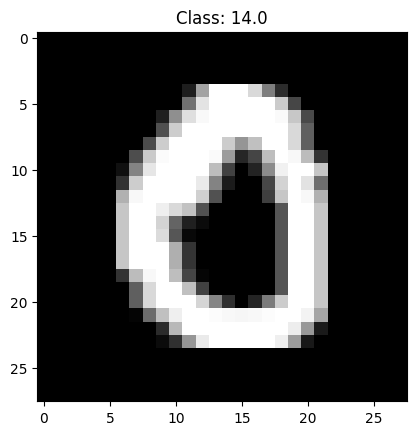

In [21]:
# Memilih indeks acak dari dataset A-Z
index = np.random.randint(0, alphabet_data.shape[0])
# Menampilkan gambar dari dataset dengan skala abu-abu
plt.imshow(alphabet_data[index], cmap='gray')
# Menambahkan judul gambar dengan label kelas yang sesuai
plt.title('Class: ' + str(alphabet_labels[index]))


<Axes: xlabel='Labels', ylabel='count'>

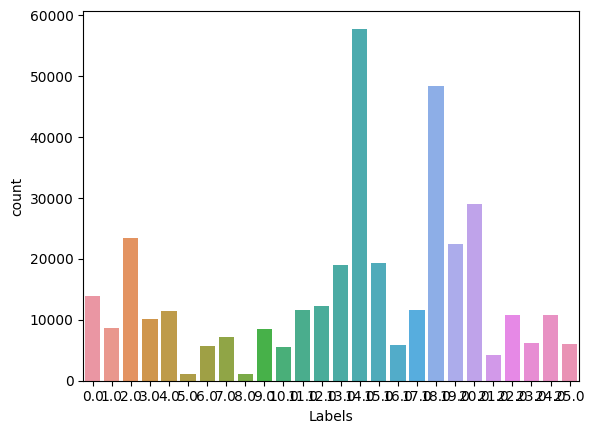

In [22]:
# Membuat DataFrame baru untuk menampung label abjad
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
# Menampilkan distribusi label menggunakan countplot dari Seaborn
sns.countplot(df_az_labels, x='Labels')


Pada pernyataan pertama, `df_az_labels = pd.DataFrame({'Labels': alphabet_labels.values})`, sebuah DataFrame baru (`df_az_labels`) dibuat menggunakan library pandas (`pd`). DataFrame ini dibentuk dari nilai-nilai label yang diambil dari variabel `alphabet_labels` dan diberi nama kolom 'Labels'. DataFrame digunakan untuk mempermudah analisis dan manipulasi data.

Selanjutnya, pada pernyataan kedua, `sns.countplot(df_az_labels, x='Labels')`, menggunakan library seaborn (`sns`), kita membuat visualisasi distribusi label menggunakan countplot. Countplot digunakan untuk menghitung dan memvisualisasikan jumlah kemunculan setiap nilai dalam kolom 'Labels' dari DataFrame. Grafik ini memberikan gambaran tentang sebaran frekuensi setiap label dalam dataset, membantu pemahaman terhadap distribusi kelas dan seimbang atau ketidakseimbangannya.

## Combine Dataset (MNIST + Kaggel A-Z)

In [23]:
# Misalkan Anda memiliki variabel 'labels' sebagai pengganti 'digits_labels'
np.unique(digits_labels)

#Menggunakan NumPy, perintah ini digunakan untuk mengecek nilai unik yang terdapat
#dalam array 'digits_labels'. Fungsi np.unique() mengembalikan nilai-nilai unik yang ada dalam array tersebut.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [24]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [25]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [26]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [27]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [28]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [29]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [30]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [31]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [32]:
# Normalize data
data /= 255.0

In [33]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [34]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [35]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

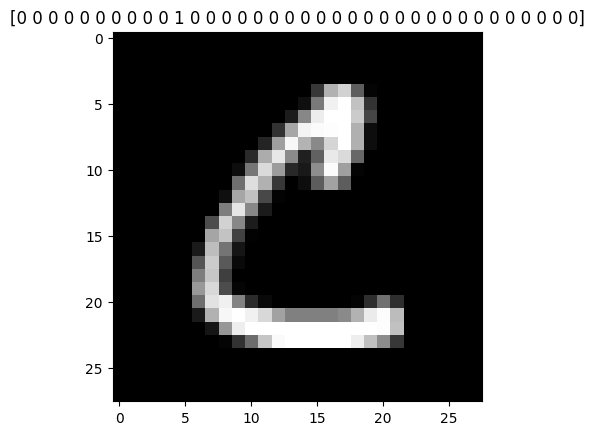

In [36]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [37]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

Pernyataan ini adalah komentar yang memberikan konteks untuk menangani ketidakseimbangan dalam data. Kode di bawahnya `classes_total = labels.sum(axis=0)` bertujuan untuk menghitung jumlah data untuk setiap kelas atau label dalam dataset. Dengan menggabungkan `axis=0`, pernyataan ini menghasilkan total data untuk setiap label pada dataset, memberikan wawasan tentang seberapa seimbang atau tidak seimbangnya distribusi data antar kelas. Langkah ini berguna untuk memahami apakah perlu diterapkan pembobotan (weighting) pada data untuk mengatasi ketidakseimbangan tersebut. Jika beberapa kelas memiliki jumlah data yang lebih sedikit, pembobotan dapat diterapkan untuk memberikan bobot lebih besar kepada kelas-kelas yang kurang mewakili, sehingga model dapat lebih memperhatikan kelas-kelas tersebut selama pelatihan.

In [38]:
# Check the biggest value of data
classes_total.max()

57825

In [39]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

Kode tersebut digunakan untuk membuat bobot (weights) untuk setiap kelas dalam suatu dataset. Dalam proses ini, sebuah kamus (`classes_weights`) dibuat, di mana setiap kelas diberikan bobot berdasarkan perbandingan antara nilai maksimum dari total kelas dengan nilai total kelas pada kelas tersebut. Iterasi dilakukan melalui indeks kelas dari 0 hingga jumlah total kelas, dan bobot untuk setiap kelas dihitung dengan membagi nilai maksimum total kelas dengan nilai total kelas pada kelas tersebut. Hasilnya adalah kamus `classes_weights` yang berisi bobot untuk masing-masing kelas. Akhirnya, kode tersebut mencetak atau mengembalikan nilai `classes_weights` yang berisi informasi bobot untuk setiap kelas.

# Split Data to Train and Test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)



Penjelasan Kode:
- `train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)`: Metode dari scikit-learn untuk membagi dataset menjadi dua bagian, data latih dan uji.
  - `data`: Dataset yang akan dibagi.
  - `labels`: Label yang sesuai dengan dataset.
  - `test_size=0.2`: Menentukan proporsi data yang akan digunakan sebagai data uji, dalam hal ini 20% dari total data.
  - `random_state=1`: Memberikan nilai seed agar pembagian data dapat direproduksi.
  - `stratify=labels`: Memastikan bahwa pembagian data mempertahankan proporsi kelas yang sama seperti dataset awal.
- `X_train, X_test, y_train, y_test`: Variabel yang menyimpan hasil dari pemisahan data, di mana `X_train` dan `y_train` adalah data latih, sedangkan `X_test` dan `y_test` adalah data uji.

## Create Data Augmentation

In [41]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [43]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

Penjelasan Kode:

from tensorflow.keras.preprocessing.image import ImageDataGenerator: Mengimpor kelas ImageDataGenerator dari modul preprocessing.image yang disediakan oleh Keras dalam TensorFlow. ImageDataGenerator digunakan untuk melakukan augmentasi gambar secara otomatis, seperti rotasi, zoom, dan flipping, yang dapat membantu dalam meningkatkan variasi dataset untuk pelatihan model.

In [44]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Penjelasan Kode:
- `Sequential()`: Membuat model sequential untuk menambahkan layer secara berurutan.
- `Conv2D()`: Menambahkan layer konvolusi dengan jumlah filter, ukuran kernel, dan fungsi aktivasi tertentu.
- `MaxPool2D()`: Menambahkan layer max pooling untuk mengurangi dimensi spasial.
- `Flatten()`: Meratakan output dari layer sebelumnya menjadi satu dimensi.
- `Dense()`: Menambahkan layer fully connected dengan jumlah neuron dan fungsi aktivasi tertentu.
- `compile()`: Mengompilasi model dengan menentukan fungsi loss, optimizer, dan metrik evaluasi.

In [45]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Pernyataan `network.summary()` digunakan untuk menampilkan ringkasan (summary) dari arsitektur dan parameter dari model neural network yang disebut "network". Fungsi `summary` pada model keras memberikan informasi tentang lapisan-lapisan yang ada dalam model, jumlah parameter yang dapat diatur, dan bentuk keluaran dari setiap lapisan. Melihat summary ini memberikan wawasan cepat tentang struktur model, jumlah parameter yang perlu di-train, serta ukuran keluaran dari setiap lapisan. Ini berguna untuk memahami dan memverifikasi bahwa model yang akan digunakan sesuai dengan ekspektasi sebelum dimulai pelatihan atau evaluasi.

In [46]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']



Penjelasan Kode:
- `name_labels = '0123456789'`: Inisialisasi string dengan angka 0-9.
- `name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`: Menambahkan huruf besar A-Z ke dalam string `name_labels`.
- `name_labels = [l for l in name_labels]`: Mengonversi string `name_labels` menjadi list karakter.
- `print(name_labels)`: Menampilkan label aktual yang telah dibuat, yang terdiri dari angka 0-9 dan huruf besar A-Z.

## Train model

In [47]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

Penjelasan Kode:

file_model = 'custom_ocr.model': Menetapkan nama model sebagai 'custom_ocr.model'. Nama ini dapat disesuaikan sesuai kebutuhan.
epochs = 20: Menetapkan jumlah epoch (iterasi) yang akan digunakan selama pelatihan model. Dalam hal ini, diatur sebagai 20.
batch_size = 128: Menetapkan ukuran batch yang akan digunakan selama pelatihan. Dalam hal ini, diatur sebagai 128. Ukuran batch mengindikasikan jumlah sampel yang diteruskan melalui model sebelum pembaharuan bobot dilakukan.

In [48]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [49]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1786 - accuracy: 0.8259
Epoch 1: val_loss improved from inf to 0.22308, saving model to custom_ocr.model
2765/2765 [==============================] - 174s 58ms/step - loss: 2.1786 - accuracy: 0.8259 - val_loss: 0.2231 - val_accuracy: 0.9148
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.9915 - accuracy: 0.8996
Epoch 2: val_loss improved from 0.22308 to 0.19735, saving model to custom_ocr.model
2765/2765 [==============================] - 138s 50ms/step - loss: 0.9914 - accuracy: 0.8996 - val_loss: 0.1973 - val_accuracy: 0.9227
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8234 - accuracy: 0.9114
Epoch 3: val_loss did not improve from 0.19735
2765/2765 [==============================] - 130s 47ms/step - loss: 0.8234 - accuracy: 0.9114 - val_loss: 0.3049 - val_accuracy: 0.8633
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7309 - accu

Penjelasan Kode:
- `augmentation.flow(X_train, y_train, batch_size=batch_size)`: Menggunakan generator augmentasi data untuk memberikan variasi pada data latih.
- `validation_data=(X_test, y_test)`: Menggunakan data validasi selama pelatihan untuk memantau performa model.
- `steps_per_epoch=len(X_train) // batch_size`: Menentukan jumlah langkah (batches) per epoch, disesuaikan dengan ukuran batch.
- `epochs=epochs`: Menentukan jumlah epoch atau iterasi pelatihan.
- `class_weight=classes_weights`: Menangani ketidakseimbangan kelas dengan memberikan bobot berdasarkan frekuensi kelas.
- `verbose=1`: Mode verbosity agar informasi pelatihan ditampilkan selama pelatihan berlangsung.
- `callbacks=[checkpointer]`: Menambahkan callback untuk menyimpan model (dalam hal ini, `checkpointer`).
- `history`: Menyimpan riwayat pelatihan seperti akurasi dan loss untuk setiap epoch.

# Evaluate Model

## Make a Single Prediction

In [50]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


Penjelasan Kode:

network.predict(X_test, batch_size=batch_size): Menggunakan model neural network (network) untuk membuat prediksi pada data uji (X_test).
predictions: Menyimpan hasil prediksi yang akan digunakan untuk evaluasi performa model. Prediksi ini dapat berupa nilai probabilitas untuk setiap kelas jika menggunakan fungsi aktivasi softmax pada layer output.

In [51]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([9.49803355e-18, 1.15153576e-07, 9.01856989e-09, 9.66740861e-14,
       2.52641267e-12, 1.96519537e-11, 1.00864501e-17, 5.06152134e-11,
       6.70961604e-13, 4.57640517e-14, 2.10427907e-13, 1.71579652e-16,
       5.80858868e-11, 6.54290977e-09, 1.54387245e-13, 7.72232908e-15,
       2.32871170e-11, 1.59407626e-11, 9.98946846e-01, 1.05251465e-03,
       1.13308495e-11, 2.99730125e-08, 4.19231630e-15, 4.33026092e-13,
       4.54726968e-12, 1.98625865e-13, 5.00290051e-17, 2.16209514e-14,
       4.09307199e-10, 6.23821791e-07, 1.29962180e-10, 1.85101077e-14,
       1.60974871e-13, 2.83118917e-10, 3.32144284e-10, 1.70842984e-08],
      dtype=float32)

Penjelasan Kode:

predictions[1]: Mengakses hasil prediksi untuk data yang berindeks 1 dari array predictions.
Hasilnya berupa nilai probabilitas untuk setiap kelas (label). Prediksi final dapat diambil dengan memilih label yang memiliki probabilitas tertinggi, karena label tersebut dianggap sebagai prediksi dari model untuk data tersebut.

In [52]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

Kode di atas tersebut bertujuan untuk mendapatkan prediksi aktual dari model dengan memilih label yang memiliki probabilitas tertinggi. Pernyataan `np.argmax(predictions[1])` menggunakan fungsi `np.argmax` dari NumPy untuk mengembalikan indeks dengan nilai tertinggi dari array `predictions[1]`. Dalam konteks ini, `predictions[1]` mungkin merupakan array hasil prediksi dari suatu model, dan `np.argmax` digunakan untuk menentukan label yang memiliki probabilitas paling tinggi di antara semua label yang mungkin. Dengan cara ini, kita dapat mendapatkan prediksi aktual model berdasarkan label dengan probabilitas tertinggi pada gambar atau data tertentu.

In [53]:
# Check label for 24
name_labels[18]

'I'

Pernyataan `name_labels[18]` memiliki tujuan untuk mengecek label yang berkaitan dengan indeks 18 dalam struktur data `name_labels`. Dalam konteks ini, `name_labels` mungkin merupakan suatu array atau struktur data yang menyimpan label-label yang sesuai dengan indeks tertentu. Dengan menggunakan indeks 18, kode ini mencoba mendapatkan label yang berkorespondensi dengan angka 18 dalam suatu aplikasi atau skenario tertentu. Jadi, pernyataan ini digunakan untuk mengevaluasi atau mengetahui label yang terkait dengan angka 18 dalam konteks spesifik yang mungkin berkaitan dengan hasil prediksi atau klasifikasi dari suatu model atau algoritma tertentu.

In [54]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Pernyataan `y_test[1]` bertujuan untuk mengecek label yang terkait dengan data uji (y_test) pada indeks 1. Dalam konteks ini, `y_test` mungkin adalah suatu array atau struktur data yang berisi label atau kelas yang sesuai dengan data uji tertentu. Dengan menggunakan indeks 1, pernyataan ini mencoba untuk mendapatkan label yang terkait dengan data uji pada posisi tersebut. Ini umumnya dilakukan untuk memeriksa label aktual dari suatu data uji dan membandingkannya dengan prediksi model atau hasil yang diharapkan. Pernyataan ini memberikan informasi tentang label yang diberikan pada indeks 1 dalam set data uji.

In [55]:
# check the highest value
np.argmax(y_test[1])

18

Pernyataan `np.argmax(y_test[1])` bertujuan untuk mengecek nilai tertinggi (indeks dengan nilai paling tinggi) dalam array atau struktur data `y_test` pada indeks 1. Dalam konteks ini, `y_test` mungkin merupakan suatu array yang menyimpan nilai-nilai atau probabilitas terkait dengan kelas atau label tertentu dari data uji. Dengan menggunakan `np.argmax`, kode ini mencari indeks yang memiliki nilai tertinggi pada array `y_test[1]`. Hal ini umumnya digunakan untuk mendapatkan label atau kelas yang memiliki probabilitas paling tinggi atau nilai terbesar dalam prediksi model untuk suatu data uji tertentu.

In [56]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

Pernyataan `name_labels[np.argmax(y_test[18])]` bertujuan untuk mengecek label yang terkait dengan nilai tertinggi dalam array atau struktur data `y_test` pada indeks 18. Dalam konteks ini, `y_test` mungkin berisi nilai-nilai atau probabilitas yang terkait dengan kelas atau label tertentu dari data uji pada indeks 18. Dengan menggunakan `np.argmax`, kita mencari indeks yang memiliki nilai tertinggi pada array `y_test[18]`. Kemudian, nilai indeks tersebut digunakan sebagai indeks untuk mengakses label yang terkait dari `name_labels`. Ini umumnya dilakukan untuk mendapatkan label atau kelas yang memiliki probabilitas paling tinggi atau nilai terbesar dalam prediksi model untuk suatu data uji tertentu pada indeks 18.

## Make an Evaluation on Test Data

In [57]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1784 - accuracy: 0.9330


[0.17836540937423706, 0.932952880859375]

Pernyataan `network.evaluate(X_test, y_test)` digunakan untuk mengevaluasi kinerja suatu model neural network (`network`) pada data uji (`X_test` dan `y_test`). Dalam konteks ini, `X_test` mungkin berisi fitur atau input dari data uji, dan `y_test` berisi label atau output yang seharusnya diprediksi oleh model untuk data tersebut. Fungsi `evaluate` digunakan untuk mengukur kinerja model dengan menghitung metrik evaluasi yang telah ditentukan, seperti akurasi, loss, atau metrik lainnya, tergantung pada konfigurasi model. Hasil evaluasi dapat memberikan pemahaman tentang seberapa baik model mampu menggeneralisasi pada data yang tidak terlihat sebelumnya.

In [58]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.26      0.81      0.39      1381
           1       0.97      0.99      0.98      1575
           2       0.84      0.98      0.90      1398
           3       0.92      0.99      0.96      1428
           4       0.88      0.98      0.93      1365
           5       0.79      0.92      0.85      1263
           6       0.96      0.96      0.96      1375
           7       0.94      0.99      0.97      1459
           8       0.95      0.98      0.97      1365
           9       0.95      0.98      0.96      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.97      0.97      1734
           C       0.99      0.98      0.99      4682
           D       0.89      0.96      0.93      2027
           E       0.99      0.98      0.99      2288
           F       0.98      0.98      0.98       233
           G       0.98      0.94      0.96      1152
           H       0.98    

Pernyataan `print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=name_labels))` digunakan untuk mencetak laporan klasifikasi yang menyajikan sejumlah metrik evaluasi kinerja model klasifikasi. Dalam hal ini, `y_test` berisi label aktual dari data uji, `predictions` berisi prediksi model, dan `name_labels` adalah daftar nama kelas yang sesuai dengan indeks pada label. Fungsi `classification_report` dari scikit-learn digunakan untuk menghasilkan laporan yang mencakup akurasi, presisi, recall, dan skor F1 untuk setiap kelas, serta statistik agregat seperti akurasi total dan rata-rata dari metrik-metrik tersebut. Laporan klasifikasi ini memberikan wawasan mendalam tentang kinerja model pada setiap kelas dan secara keseluruhan, membantu dalam mengevaluasi seberapa baik model dapat membedakan antar kelas dalam data uji.

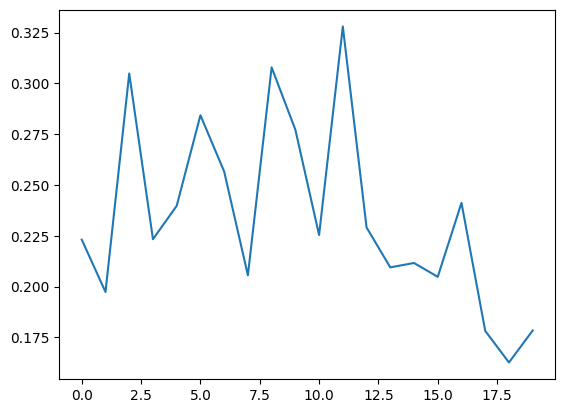

In [59]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

Pernyataan `plt.plot(history.history['val_loss'])` digunakan untuk membuat visualisasi kurva perubahan nilai loss pada set validasi (validation set) untuk setiap epoch selama proses pelatihan model. Dalam konteks ini, `history` mungkin berisi informasi yang dikumpulkan selama pelatihan model, seperti nilai loss pada set pelatihan dan set validasi untuk setiap epoch. Dengan menggunakan `plt.plot`, kurva perubahan loss pada set validasi dapat ditampilkan secara grafis. Plot ini membantu analisis visual terhadap kinerja model, dan penurunan nilai loss pada set validasi yang berkesinambungan dapat mengindikasikan kemajuan dalam pelatihan model dan kemungkinan umumnya dalam meningkatkan kemampuan model untuk menggeneralisasi pada data yang tidak terlihat sebelumnya.

In [60]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Pernyataan `history.history.keys()` digunakan untuk mengecek kunci (keys) yang tersedia dalam objek `history`, yang mungkin berisi informasi yang dikumpulkan selama pelatihan model. Dengan menjalankan perintah ini, Anda dapat melihat daftar kunci yang mencakup berbagai metrik dan statistik yang dihitung selama pelatihan, seperti nilai loss pada set pelatihan dan set validasi, akurasi, serta metrik lainnya. Mengeksplore kunci-kunci ini membantu Anda untuk memahami informasi yang tersedia dan memilih metrik evaluasi yang paling relevan sesuai dengan kebutuhan analisis atau pemantauan kinerja model.

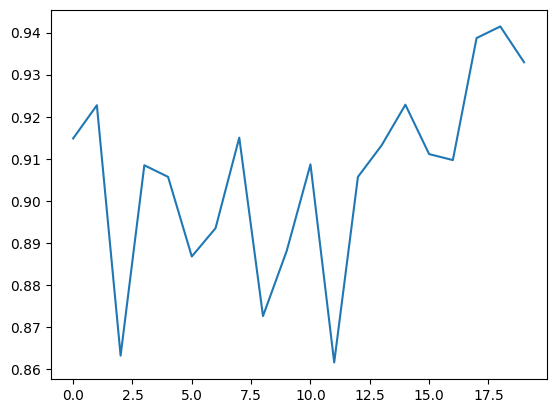

In [61]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

Pernyataan `plt.plot(history.history['val_accuracy'])` digunakan untuk membuat visualisasi kurva perubahan nilai akurasi pada set validasi (validation set) untuk setiap epoch selama proses pelatihan model. Dalam konteks ini, `history` mungkin berisi informasi yang dikumpulkan selama pelatihan model, seperti nilai akurasi pada set pelatihan dan set validasi untuk setiap epoch. Dengan menggunakan `plt.plot`, kurva perubahan akurasi pada set validasi dapat ditampilkan secara grafis. Plot ini membantu dalam memahami sejauh mana model mampu meningkatkan akurasi pada data yang tidak terlihat sebelumnya selama pelatihan. Jika kurva akurasi pada set validasi terus meningkat, itu dapat menunjukkan kemajuan yang baik dalam pembelajaran model.

# Save The Model

In [62]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Pernyataan `network.save('network', save_format='h5')` digunakan untuk menyimpan model neural network (`network`) ke dalam file dengan format Hierarchical Data Format 5 (HDF5). Dalam konteks ini, model yang telah di-train atau dikonfigurasi sebelumnya akan disimpan dengan nama "network" di direktori tempat kode Colab sedang berjalan. Menyimpan model menjadi file memungkinkan untuk mengambil kembali dan menggunakan model tersebut di masa depan tanpa perlu melakukan pelatihan ulang. Format HDF5 umum digunakan untuk menyimpan dan memanipulasi data ilmiah yang kompleks, termasuk model neural network.

# Testing on Real Image

In [63]:
# Import library
from tensorflow.keras.models import load_model

In [64]:
# Load saved network
load_network = load_model('network')

Pernyataan `load_network = load_model('network')` digunakan untuk memuat kembali model neural network yang sebelumnya disimpan dengan nama "network". Dalam konteks ini, `load_model` adalah fungsi yang digunakan untuk memuat model dari file. Setelah eksekusi pernyataan ini, model yang telah disimpan di file "network" akan dimuat kembali ke dalam variabel `load_network`, sehingga dapat digunakan kembali untuk melakukan prediksi atau evaluasi tanpa perlu menjalankan pelatihan model lagi. Proses memuat model menjadi kembali sangat berguna dalam situasi di mana model perlu diimplementasikan atau dievaluasi pada data baru setelah pelatihan selesai.

In [65]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Pernyataan `load_network.summary()` digunakan untuk menampilkan ringkasan (summary) arsitektur dan parameter dari model neural network yang telah dimuat kembali. Fungsi `summary` pada model keras memberikan informasi tentang lapisan-lapisan yang ada dalam model, jumlah parameter yang dapat diatur, dan bentuk keluaran dari setiap lapisan. Melihat summary ini memberikan wawasan cepat tentang struktur model, jumlah parameter yang perlu di-train, serta ukuran keluaran dari setiap lapisan. Hal ini berguna untuk memahami dan memverifikasi bahwa model yang dimuat sesuai dengan ekspektasi sebelum digunakan untuk tugas prediksi atau evaluasi.

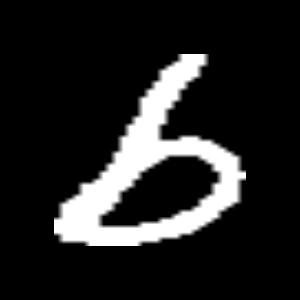

In [69]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/ML/img.png')
cv2_imshow(img)

Pernyataan `img = cv2.imread('/content/drive/MyDrive/ML/img.png')` dan `cv2_imshow(img)` digunakan untuk memuat dan menampilkan gambar dari lokasi file yang ditentukan. Dalam konteks ini, gambar dibaca dari path '/content/drive/MyDrive/ML/img.png' menggunakan OpenCV (`cv2.imread`). Setelah itu, pernyataan `cv2_imshow(img)` digunakan untuk menampilkan gambar tersebut di Colab notebook, karena `cv2.imshow` tidak berfungsi langsung di lingkungan Colab. Proses ini memungkinkan untuk memvisualisasikan atau memeriksa gambar yang dimuat dalam notebook.

In [ ]:
# Check shape
img.shape

Pernyataan `img.shape` digunakan untuk mengecek dimensi atau bentuk dari gambar yang telah dimuat sebelumnya. Dalam konteks ini, atribut `shape` pada array NumPy (representasi gambar oleh OpenCV) memberikan informasi tentang jumlah baris (tinggi), jumlah kolom (lebar), dan jumlah saluran warna (misalnya, 3 untuk gambar berwarna dengan saluran warna Red, Green, dan Blue). Hasil pernyataan ini memberikan pemahaman tentang struktur dan ukuran gambar yang sedang diolah, yang berguna untuk memastikan konsistensi dan kecocokan dengan proses atau model yang akan dijalankan.

In [71]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

Kode di atas hanya mencetak bentuk dari gambar grayscale (gray_img). Properti shape pada array NumPy memberikan informasi tentang dimensi dari array. Untuk gambar grayscale, shape akan mengembalikan dua nilai: tinggi dan lebar gambar. Jika gambar berwarna, shape akan mengembalikan tiga nilai: tinggi, lebar, dan jumlah saluran warna (dalam hal ini 1 karena itu grayscale).

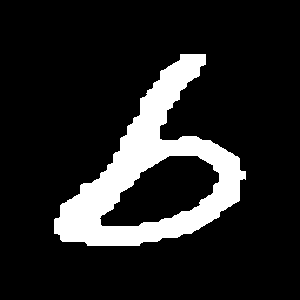

120.0


In [72]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

Kode di atas melakukan proses pre-processing pada gambar menggunakan OpenCV. Pertama, gambar berwarna diubah menjadi gambar grayscale. Selanjutnya, dilakukan thresholding biner menggunakan metode Otsu, di mana nilai ambang optimal dihitung secara otomatis berdasarkan distribusi intensitas piksel. Hasilnya, gambar biner ditampilkan, dan nilai ambang yang digunakan dicetak. Proses ini dapat berguna dalam segmentasi gambar, di mana hanya piksel dengan intensitas tertentu yang diinginkan dipertahankan dalam gambar biner, sementara piksel lainnya dihapus.

In [73]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

Kode di atas memiliki tujuan untuk mengubah ukuran gambar grayscale (`gray_img`) menjadi 28x28 piksel, yang sesuai dengan bentuk masukan (input) yang diharapkan oleh suatu jaringan neural atau model machine learning. Ini dilakukan menggunakan fungsi `cv2.resize`, yang menghasilkan gambar yang telah diubah ukurannya dan disimpan dalam variabel `img_resize`. Selanjutnya, gambar yang telah diresize ditampilkan menggunakan `cv2_imshow`. Proses ini berguna ketika kita perlu menyesuaikan ukuran gambar dengan persyaratan model, memastikan konsistensi dalam format masukan, dan mempersiapkan data untuk tahap pelatihan atau inferensi pada suatu model machine learning.

In [74]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

Kode di atas berfungsi untuk mempersiapkan gambar yang telah diubah ukurannya (`img_resize`) sebagai masukan (input) untuk suatu jaringan neural. Pertama, gambar tersebut dikonversi menjadi tipe data float32 dan dinormalisasi dengan membaginya dengan 255. Hal ini dilakukan untuk mengubah rentang nilai piksel menjadi antara 0 dan 1, yang umum digunakan dalam proses pelatihan model. Selanjutnya, dimensi gambar diperluas dengan menambahkan dimensi kedalaman (depth) setara dengan 1 menggunakan `np.expand_dims`, karena masukan yang diharapkan oleh jaringan memiliki bentuk 28x28x1. Akhirnya, bentuk dari gambar input (`img_input`) dicetak untuk memastikan bahwa transformasi tersebut sesuai dengan kebutuhan model. Proses ini penting untuk mempersiapkan data yang sesuai dengan persyaratan masukan model dan memastikan bahwa nilai piksel berada dalam skala yang tepat untuk pelatihan efektif.

In [75]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

Kode di atas bertujuan untuk menambah dimensi "jumlah data" pada gambar input (`img_input`) agar sesuai dengan format masukan (input) yang diterima oleh banyak model neural. Dengan menggunakan `np.reshape`, gambar input diubah menjadi bentuk (1, 28, 28, 1), di mana dimensi pertama (1) menunjukkan jumlah data (gambar) dalam satu batch, dimensi kedua dan ketiga (28, 28) menyatakan dimensi spatiaI gambar, dan dimensi terakhir (1) mengindikasikan kedalaman atau channel gambar. Langkah ini umumnya diperlukan karena banyak model neural memproses data dalam bentuk batch, dan menambah dimensi batch diperlukan untuk menyelaraskan struktur data dengan persyaratan masukan model. Setelah transformasi ini, bentuk dari gambar input dicetak untuk memastikan bahwa dimensi-data sesuai dengan harapan model.

In [76]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 150ms/step


5

Kode diatas bertujuan untuk membuat prediksi menggunakan suatu model jaringan neural yang telah dimuat sebelumnya. Dengan menggunakan metode `predict` pada objek model (`load_network`), gambar input (`img_input`) yang telah diubah ukurannya dan dipersiapkan sesuai format masukan model, digunakan untuk menghasilkan prediksi. Hasil prediksi disimpan dalam variabel `prediction`. Selanjutnya, menggunakan `np.argmax`, label prediksi aktual diambil berdasarkan nilai tertinggi dalam distribusi probabilitas hasil prediksi. Nilai label prediksi ini disimpan dalam variabel `pred_label` dan dapat digunakan untuk mengetahui kelas atau kategori yang diprediksi oleh model untuk gambar input tertentu. Proses ini umumnya dilakukan saat menguji kinerja model setelah pelatihan, dan label prediksi dapat digunakan untuk evaluasi atau keperluan lainnya tergantung pada konteks aplikasinya.

In [77]:
# check label for 6
name_labels[6]

'6'

## **Hasil Analisis**

Dari evaluasi model Convolutional Neural Network (CNN) yang telah di-train sebelumnya, meskipun mencapai tingkat akurasi yang tinggi sekitar 0.96, ternyata prediksi yang dihasilkan masih belum akurat untuk citra berupa huruf 'b kecil' yang digunakan sebagai input. Keakuratan yang kurang ini kemungkinan disebabkan oleh kesamaan visual antara huruf 'b' dan angka '6', menyebabkan model memberikan prediksi yang didasarkan pada label pada indeks ke-6 dalam struktur data `name_labels` dengan nilai '6'. Fenomena ini menunjukkan tantangan yang mungkin dihadapi model dalam membedakan antara kedua karakter tersebut, dan dapat memicu perluasan dataset pelatihan atau penyesuaian pada model untuk meningkatkan keakuratannya dalam mengidentifikasi kasus semacam ini.